In [1]:
import requests
import lxml.html as lh
import pandas as pd

In [2]:
url = 'https://sabr.org/bioproj/topic/baseball-demographics-1947-2016/'

In [3]:
page = requests.get(url)

In [4]:
doc = lh.fromstring(page.content)

In [5]:
tr_elements = doc.xpath('//tr')

In [6]:
columns = []
i = 0

for t in tr_elements[0]:
    i += 1
    name = t.text_content()
    print('%d:"%s"'%(i,name))
    columns.append((name,[]))

1:"Year"
2:"White "
3:"AfricanAmericans"
4:"Latino"
5:"Asian"


In [7]:
for j in range(1, len(tr_elements)):
    T = tr_elements[j]

    # if len(T) != 5:
    #     break

    i=0

    for t in T.iterchildren():
        data = t.text_content()

        if i > 0:
            try:
                data = int(data)
            except:
                pass
        columns[i][1].append(data)
        i += 1

In [8]:
[len(C) for (title, C) in columns]

[141, 141, 141, 141, 141]

In [9]:
Dict={title:column for (title, column) in columns}

In [10]:
df1 = pd.DataFrame(Dict) 

In [20]:
all_players = df1.iloc[:70]

In [21]:
all_players.tail()

,Year,White,AfricanAmericans,Latino,Asian
65,2012,63.9%,7.2%,26.9%,1.9%
66,2013,63.6%,6.7%,27.7%,2.0%
67,2014,63.7%,6.7%,27.7%,1.8%
68,2015,63.4%,7.2%,27.7%,1.7%
69,2016,63.7%,6.7%,27.4%,2.1%


In [22]:
all_players_war = df1.iloc[71:]

In [23]:
all_players_war.tail()

,Year,White,AfricanAmericans,Latino,Asian
136,2012,58.3%,11.4%,28.0%,2.2%
137,2013,57.3%,7.7%,30.7%,4.3%
138,2014,59.1%,11.0%,27.3%,2.7%
139,2015,58.1%,11.6%,28.0%,2.3%
140,2016,59.9%,8.3%,29.2%,2.5%


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

# All players demographics graph

In [27]:
x = all_players.Year
y = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

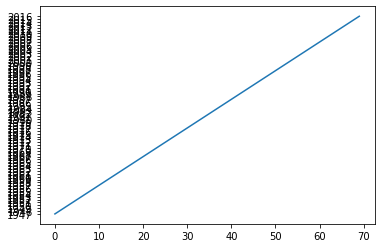

In [29]:
plt.plot(x)
plt.show()